In [1]:
import numpy as np
import numpy.linalg as la
from scipy.stats import norm

a. Write a python function that takes parameter ```n``` and ```rho``` that returns n pairs ```(X, Y)``` of correlated zero-mean Gaussian RVs with variance one as ```numpy.array```

```
array([[x_0, x_1, x_2, ... x_(n-1)],
       [y_0, y_1, y_2, ... y_(n-1)]])
```

such that $\rho_{XY} = \text{rho}$

functions you may need:

* ```np.dot()```
* ```la.eigh()```
* ```norm.rvs()```

b. (optional) Can you rewrite the function so that X and Y can have arbitary means?

c. (Optional) Can you rewrite the function so that X and Y can have arbitary means and varinances?

In [2]:
def correlatedGaussianPairs(n, rho, mu1=0, mu2=0, sig1=1, sig2=1):
    if abs(rho) > 1:
        raise ValueError("correlation coefficient shoule stay between +1 and -1")
    CovXY = rho * sig1 * sig2
    wz = norm.rvs(size=[2, n])
    K = np.array([[sig1 ** 2, CovXY], 
                  [CovXY, sig2 ** 2]])
    [lambdas, eigs] = la.eigh(K)
    idx = np.argsort(lambdas)[::-1]
    lambdas = lambdas[idx]
    eigs = eigs[:,idx]
    left = np.dot(eigs, np.diag(np.sqrt(lambdas)))
    xy = np.dot(left, wz)
    xy += np.array([mu1 * np.ones(n), mu2 * np.ones(n)])
    return xy

---

d. Generate 1000 pairs of (X, Y) with $\rho_{XY} = 0.7$ and show the pairs generated by your function are correct

Hint: You can take advantage of numpy built-in functions

In [3]:
mu1, mu2 = 0, 0
sig1, sig2 = 1, 1
rho = 0.7
n = 5 * 10 ** 3
CovXY = rho * sig1 * sig2
K = np.array([[sig1 ** 2, CovXY], 
              [CovXY, sig2 ** 2]])

In [4]:
xy = correlatedGaussianPairs(n, rho)
print("mean:",np.mean(xy, axis=1))
print("std:",np.std(xy, axis=1))
print("cov(X, Y):",np.cov(xy))
print("rho:",np.corrcoef(xy))

mean: [-0.00634614  0.0014095 ]
std: [1.0022237  1.01433814]
cov(X, Y): [[1.00465327 0.718102  ]
 [0.718102   1.02908768]]
rho: [[1.         0.70623924]
 [0.70623924 1.        ]]


---

e. plot all (X, Y) pairs as scatter plot using plt.scatter

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

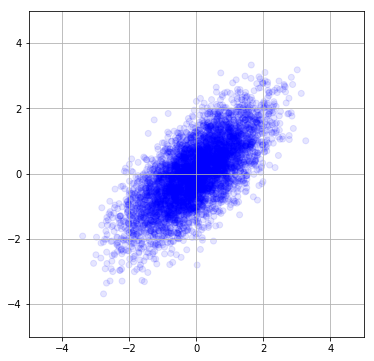

In [6]:
x = xy[0].tolist()
y = xy[1].tolist()
c = ['b'] * n
ax = plt.figure(figsize=[6,6])
plt.scatter(x, y, c=c, alpha=0.1)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

---

f. replace the RV with smaller variance by it's mean, draw a new scatter plot over previous one, and calculate MSE

In [7]:
xyHat = xy.copy()
xyHat[1] = 0

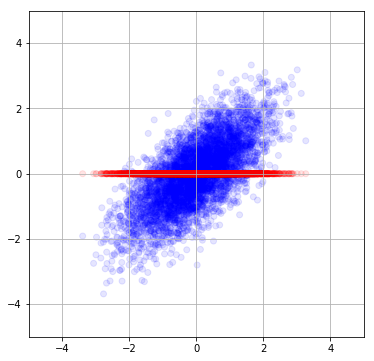

In [8]:
x = xy[0].tolist()
y = xy[1].tolist()
c = ['b'] * n
xHat = xyHat[0].tolist()
yHat = xyHat[1].tolist()
cHat = ['r'] * n

ax = plt.figure(figsize=[6,6])
plt.scatter(x, y, c=c, alpha=0.1)
plt.scatter(xHat, yHat, c=cHat, alpha=0.1)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

In [9]:
print("MSE:",la.norm((xy - xyHat) ** 2, axis=0).mean())

MSE: 1.0288838491940784


---

g. Use KLT to transform correlated (X, Y) into uncorrelated RV pairs (W, Z) such that $Var\left[W\right]$ is maximized.  Replace Z with it's mean $\mu_Z$ and transform (W, $\mu_Z$) back to (X', Y') and repeat (e) and (f)

In [10]:
[lambdas, eigs] = la.eigh(K)
idx = np.argsort(lambdas)[::-1]
lambdas = lambdas[idx]
eigs = eigs[:,idx]
xy2 = np.dot(eigs.transpose(), xy)
xy2[1] = 0
xyHat2 = np.dot(eigs, xy2)

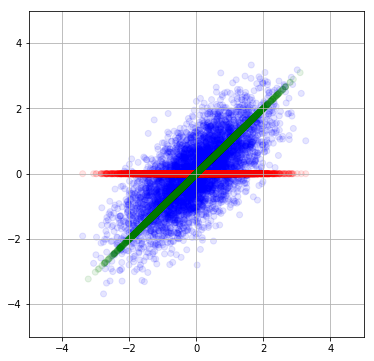

In [11]:
xHat2 = xyHat2[0].tolist()
yHat2 = xyHat2[1].tolist()
cHat2 = ['g'] * n

ax = plt.figure(figsize=[6,6])
plt.scatter(x, y, c=c, alpha=0.1)
plt.scatter(xHat, yHat, c=cHat, alpha=0.1)
plt.scatter(xHat2, yHat2, c=cHat2, alpha=0.1)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

In [12]:
print("MSE:",la.norm((xy - xyHat2) ** 2, axis=0).mean())

MSE: 0.2112402313185833


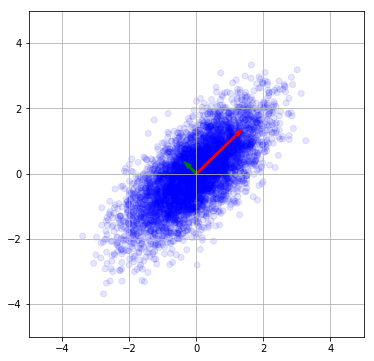

In [13]:
x = xy[0].tolist()
y = xy[1].tolist()
c = ['b'] * n

ax = plt.figure(figsize=[6,6])
plt.scatter(x, y, c=c, alpha=0.1)
plt.arrow(0, 0, eigs[0,0] * lambdas[0], eigs[1,0] * lambdas[0], width=0.05, color='r')
plt.arrow(0, 0, eigs[0,1] * lambdas[1], eigs[1,1] * lambdas[1], width=0.05, color='g')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()